In [4]:
"""
    This notebook is used to generate the figures for the following section:
    "A Stomatogastric Ganglion Neuron Model"
"""

'\n    This notebook is used to generate the figures for the following section:\n    "A Stomatogastric Ganglion Neuron Model"\n'

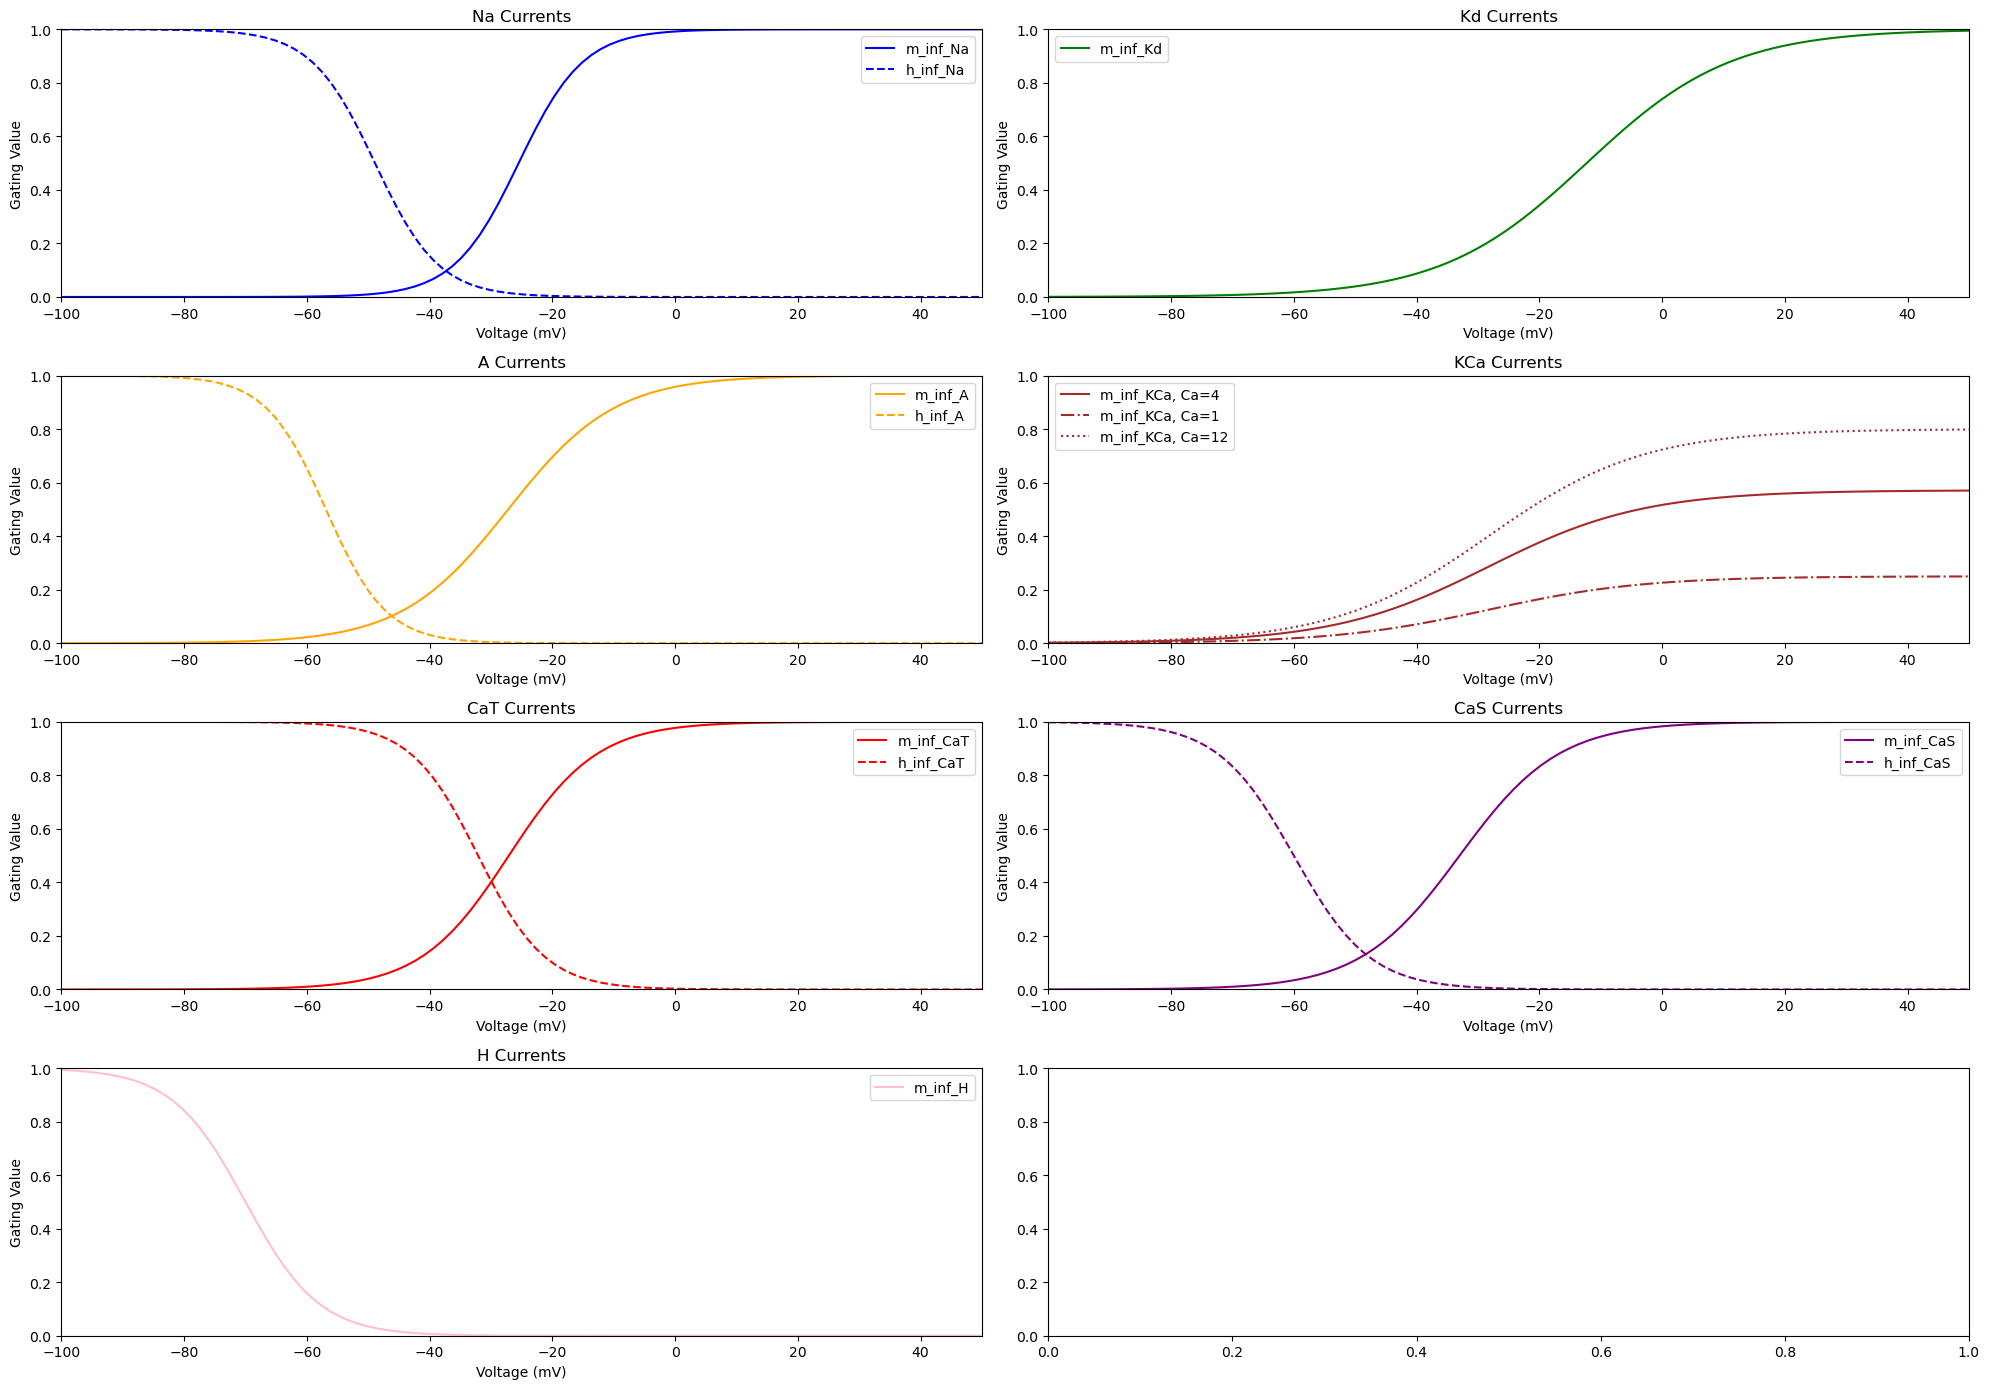

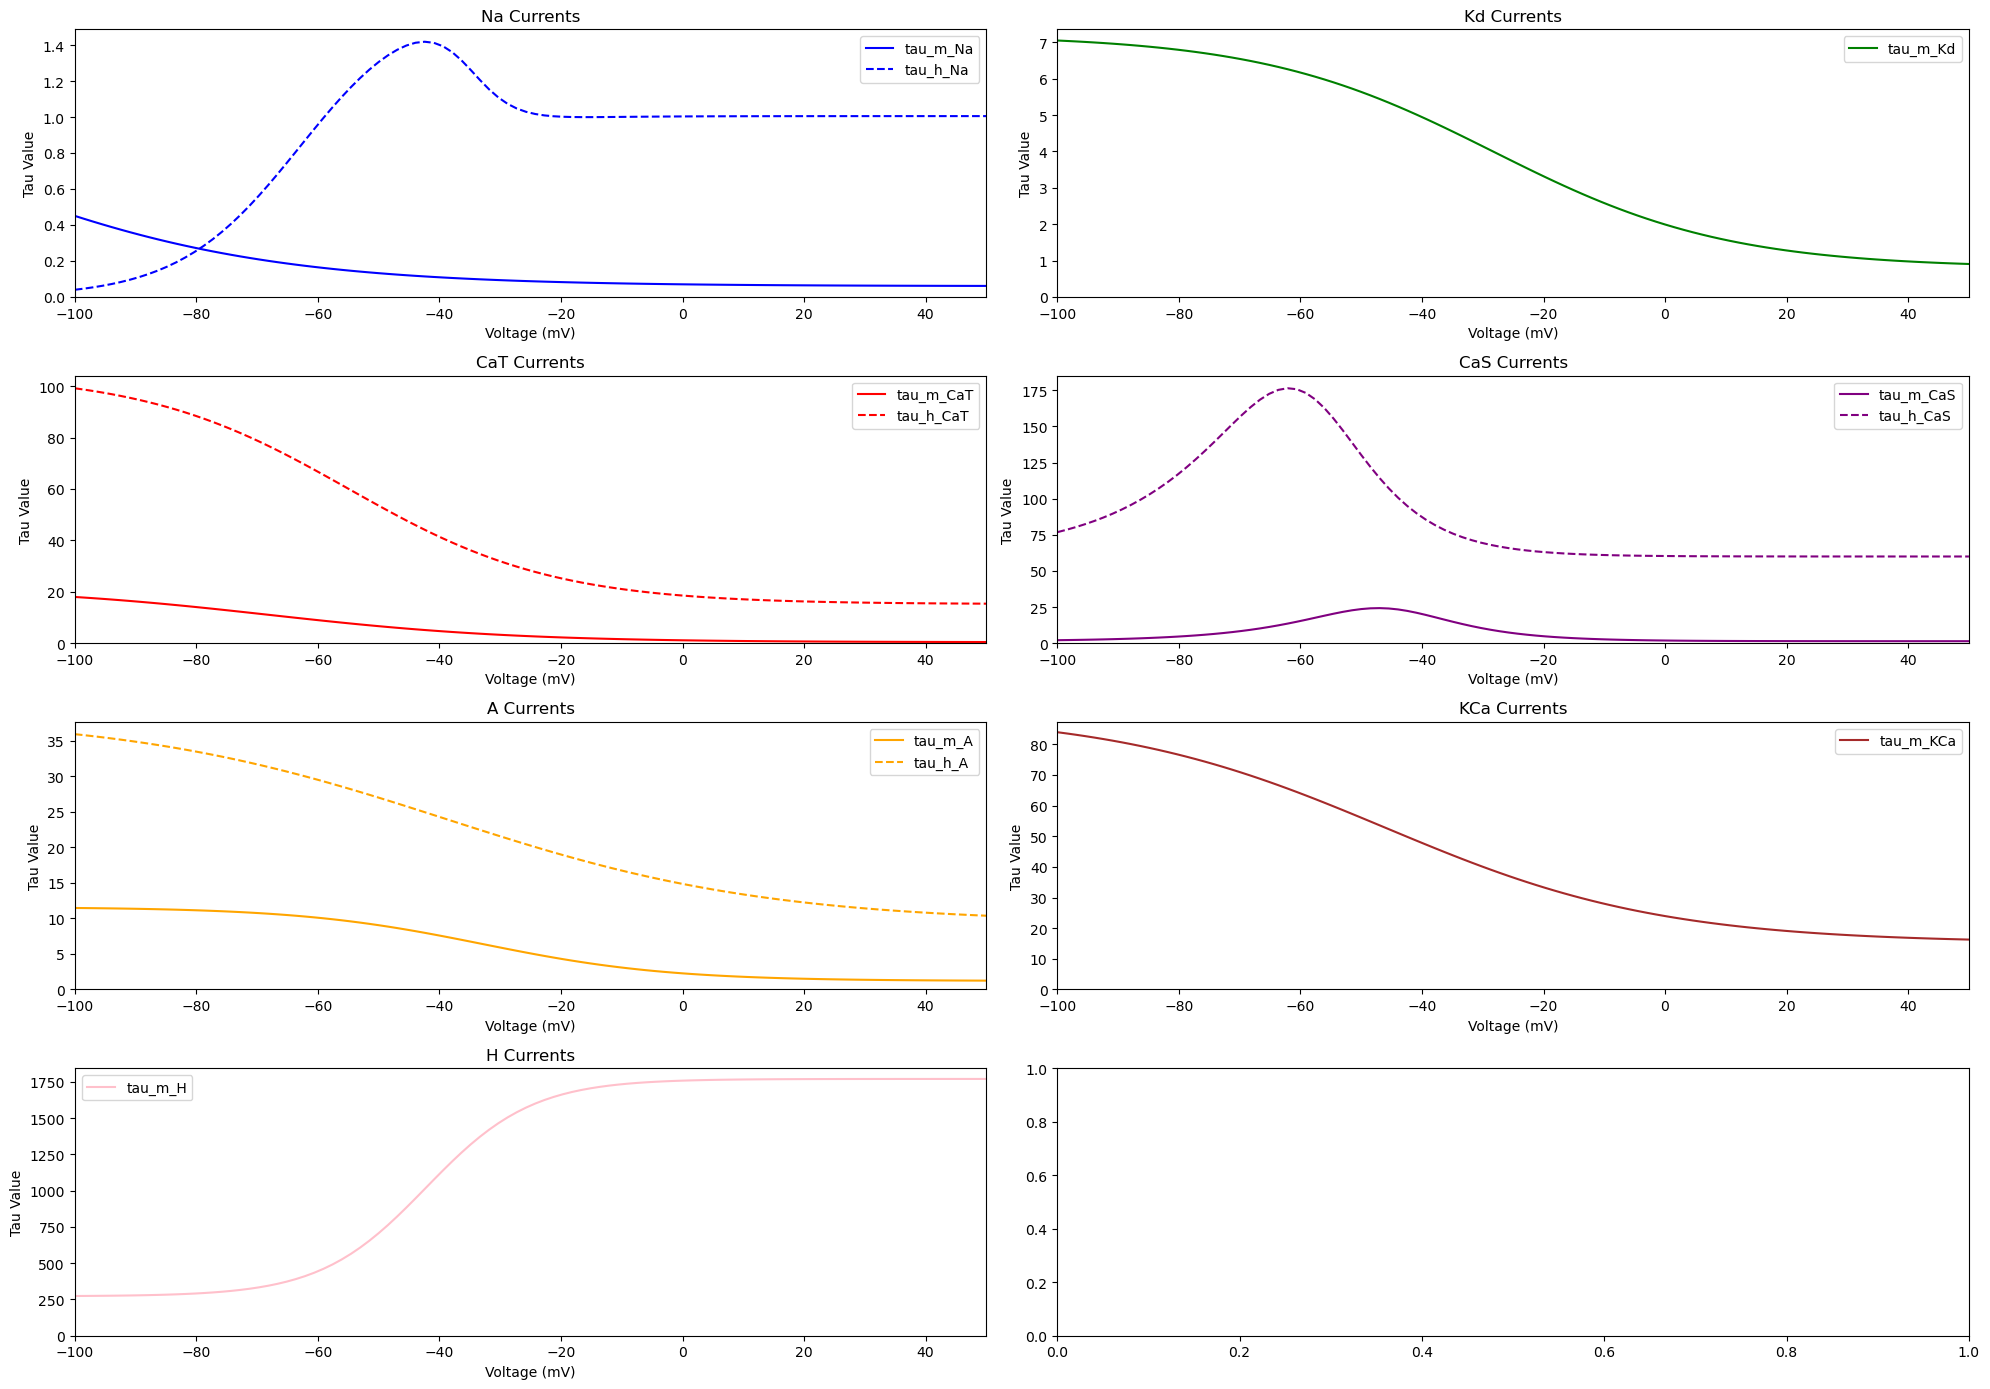

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from stg import m_inf_Na, h_inf_Na, m_inf_Kd, m_inf_CaT, h_inf_CaT, m_inf_CaS, h_inf_CaS, m_inf_A, h_inf_A, m_inf_KCa, m_inf_H

V = np.linspace(-100, 50, 100)

fig, axes = plt.subplots(4, 2, figsize=(20, 14))
axes = axes.flatten()

Ca1 = 4
Ca2 = 1
Ca3 = 12

currents = [
    ([(m_inf_Na, 'm_inf_Na', 'blue', '-'), (h_inf_Na, 'h_inf_Na', 'blue', '--')], 'Na Currents'),
    ([(m_inf_Kd, 'm_inf_Kd', 'green', '-')], 'Kd Currents'),
    ([(m_inf_A, 'm_inf_A', 'orange', '-'), (h_inf_A, 'h_inf_A', 'orange', '--')], 'A Currents'),
    ([(lambda V: m_inf_KCa(V, Ca1), 'm_inf_KCa, Ca=4', 'brown', '-'),
      (lambda V: m_inf_KCa(V, Ca2), 'm_inf_KCa, Ca=1', 'brown', '-.'),
      (lambda V: m_inf_KCa(V, Ca3), 'm_inf_KCa, Ca=12', 'brown', ':')], 'KCa Currents'),
    ([(m_inf_CaT, 'm_inf_CaT', 'red', '-'), (h_inf_CaT, 'h_inf_CaT', 'red', '--')], 'CaT Currents'),
    ([(m_inf_CaS, 'm_inf_CaS', 'purple', '-'), (h_inf_CaS, 'h_inf_CaS', 'purple', '--')], 'CaS Currents'),
    ([(m_inf_H, 'm_inf_H', 'pink', '-')], 'H Currents')
]

for ax, (current_group, title) in zip(axes, currents):
    for func, label, color, linestyle in current_group:
        ax.plot(V, func(V), label=label, color=color, linestyle=linestyle)
    ax.set_xlabel('Voltage (mV)')
    ax.set_ylabel('Gating Value')
    ax.set_ylim(0, 1)
    ax.set_xlim(-100, 50)
    ax.legend()
    ax.set_title(title)

fig.tight_layout()
plt.savefig('figures/stg_gating_values.svg')
plt.show()

from stg import tau_m_Na, tau_h_Na, tau_m_Kd, tau_m_CaT, tau_h_CaT, tau_m_CaS, tau_h_CaS, tau_m_A, tau_h_A, tau_m_KCa, tau_m_H

fig, axes = plt.subplots(4, 2, figsize=(20, 14))
axes = axes.flatten()
tau_currents = [
    ([(tau_m_Na, 'tau_m_Na', 'blue', '-'), (tau_h_Na, 'tau_h_Na', 'blue', '--')], 'Na Currents'),
    ([(tau_m_Kd, 'tau_m_Kd', 'green', '-')], 'Kd Currents'),
    ([(tau_m_CaT, 'tau_m_CaT', 'red', '-'), (tau_h_CaT, 'tau_h_CaT', 'red', '--')], 'CaT Currents'),
    ([(tau_m_CaS, 'tau_m_CaS', 'purple', '-'), (tau_h_CaS, 'tau_h_CaS', 'purple', '--')], 'CaS Currents'),
    ([(tau_m_A, 'tau_m_A', 'orange', '-'), (tau_h_A, 'tau_h_A', 'orange', '--')], 'A Currents'),
    ([(tau_m_KCa, 'tau_m_KCa', 'brown', '-')], 'KCa Currents'),
    ([(tau_m_H, 'tau_m_H', 'pink', '-')], 'H Currents')
]

for ax, (current_group, title) in zip(axes, tau_currents):
    for func, label, color, linestyle in current_group:
        ax.plot(V, func(V), label=label, color=color, linestyle=linestyle)
    ax.set_xlabel('Voltage (mV)')
    ax.set_ylabel('Tau Value')
    ax.legend()
    ax.set_title(title)
    ax.set_xlim(-100, 50)
    ax.set_ylim(0, None)

fig.tight_layout()
plt.savefig('figures/stg_tau_values.svg')
plt.show()

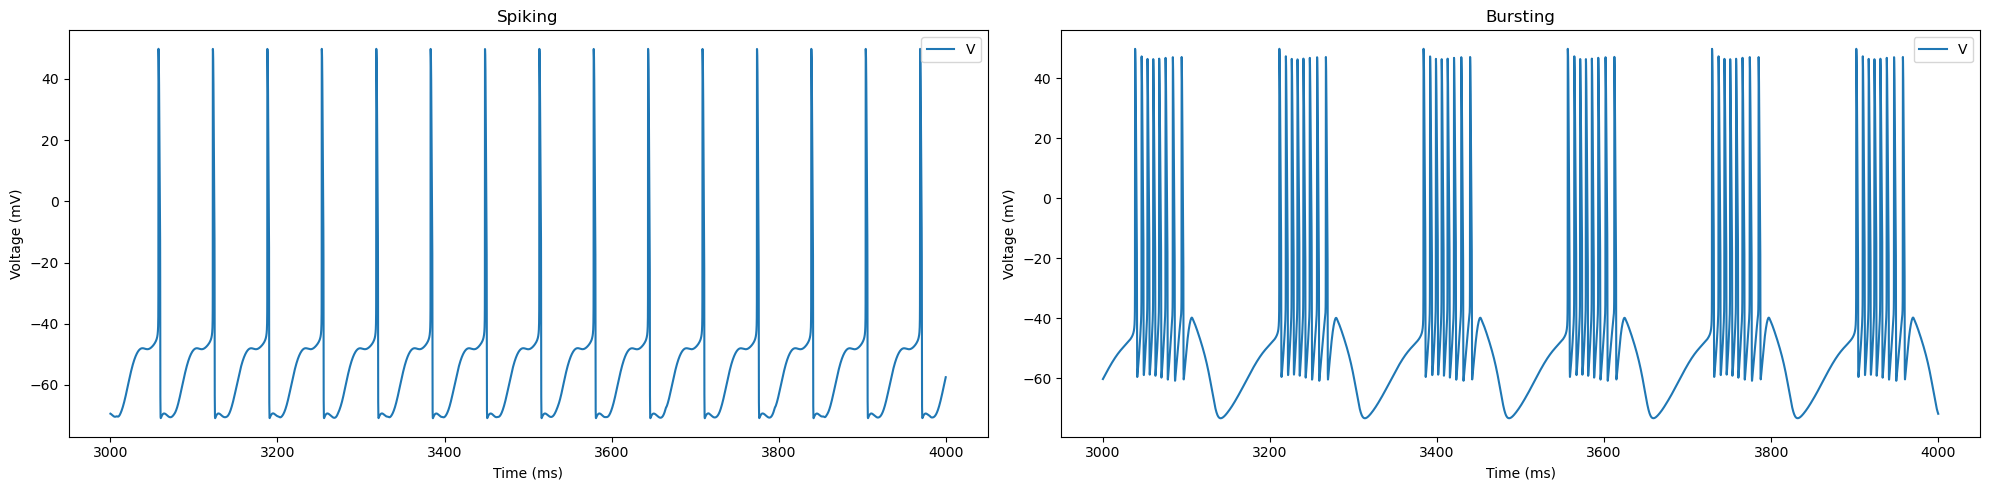

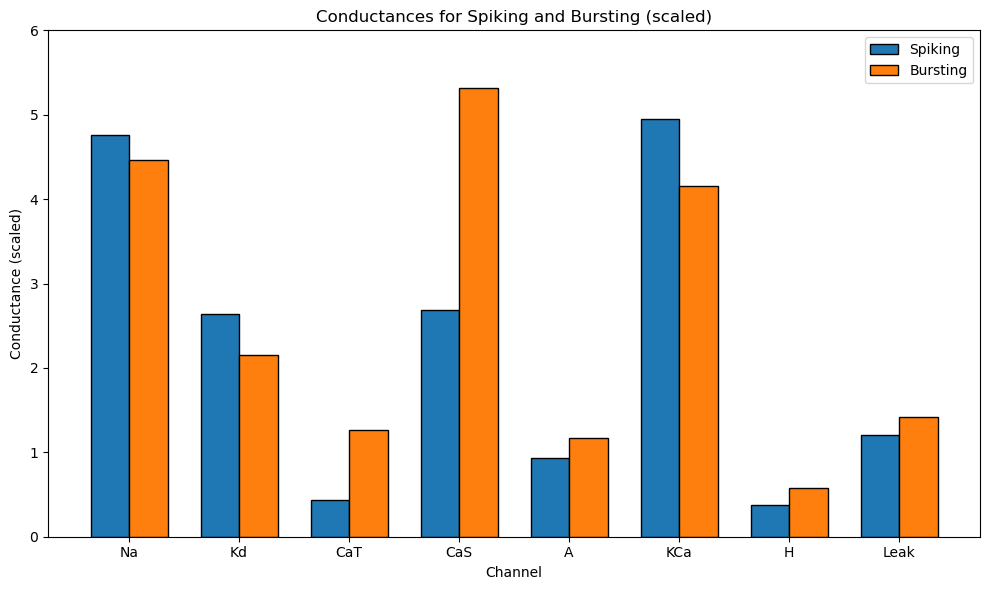

In [2]:
#g_tonic_spiking = [6.45107666e+03, 2.63884496e+02, 4.38604312e+00, 2.68271507e+01, 9.31089184e+01, 4.94869664e+02, 3.72942945e-01, 1.20014004e-02]
#g_bursting = [4.45932851e+03, 2.15422644e+02, 1.26581051e+01, 5.31943005e+01, 1.16558824e+02, 4.15288208e+02, 5.75437208e-01, 1.42445689e-02]
g_tonic_spiking = [4.75932851e+03, 2.63884496e+02, 4.38604312e+00, 2.68271507e+01, 9.31089184e+01, 4.94869664e+02, 3.72942945e-01, 1.20014004e-02]
g_bursting = [4.45932851e+03, 2.15422644e+02, 1.26581051e+01, 5.31943005e+01, 1.16558824e+02, 4.15288208e+02, 5.75437208e-01, 1.42445689e-02]
from stg import simulate_individual_t_eval
from stg import get_default_u0
from stg import get_default_parameters

t_eval = np.arange(3000, 4000, 0.05)
sol_spiking = simulate_individual_t_eval((get_default_u0(), g_tonic_spiking, t_eval, get_default_parameters()))
sol_bursting = simulate_individual_t_eval((get_default_u0(), g_bursting, t_eval, get_default_parameters()))

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].plot(t_eval, sol_spiking[1, :], label='V')
axes[0].set_title('Spiking')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Voltage (mV)')
axes[0].legend()

axes[1].plot(t_eval, sol_bursting[1, :], label='V')
axes[1].set_title('Bursting')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].legend()

fig.tight_layout()
plt.savefig('figures/stg_spiking_bursting.svg')
plt.show()

# Introduce y scaling factor because the channels have really different scales
scaling_factors = [1e-3, 1e-2, 1e-1, 1e-1, 1e-2, 1e-2, 1, 1e2]

# bar plot of the conductances with scaling
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(8)
scaled_g_tonic_spiking = [g * s for g, s in zip(g_tonic_spiking, scaling_factors)]
scaled_g_bursting = [g * s for g, s in zip(g_bursting, scaling_factors)]
bar1 = ax.bar(index, scaled_g_tonic_spiking, bar_width, label='Spiking', edgecolor='black')
bar2 = ax.bar(index + bar_width, scaled_g_bursting, bar_width, label='Bursting', edgecolor='black')
ax.set_xlabel('Channel')
ax.set_ylabel('Conductance (scaled)')
ax.set_title('Conductances for Spiking and Bursting (scaled)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Na', 'Kd', 'CaT', 'CaS', 'A', 'KCa', 'H', 'Leak'])
ax.set_ylim(0,6)
ax.legend()
fig.tight_layout()
plt.savefig('figures/stg_conductances_scaled.svg')
plt.show()

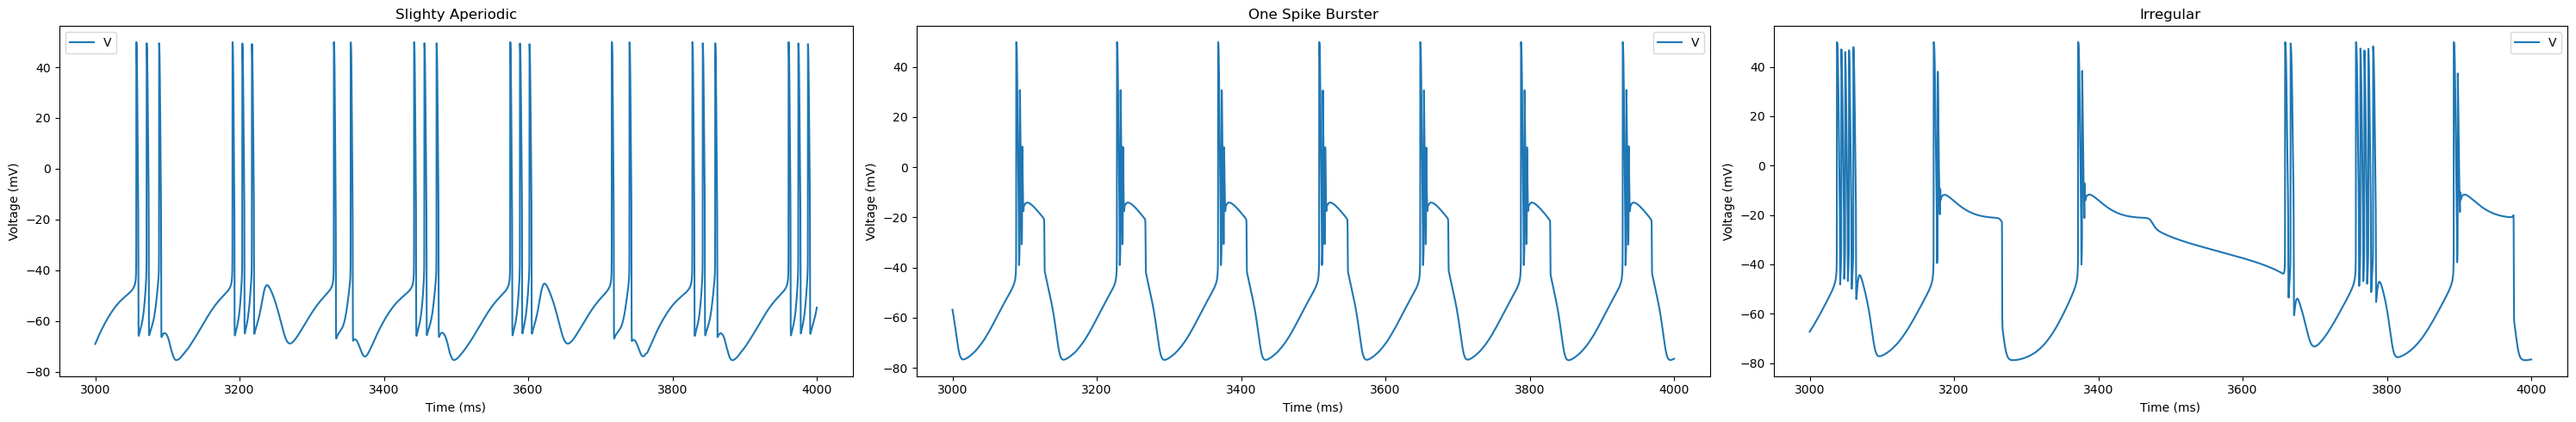

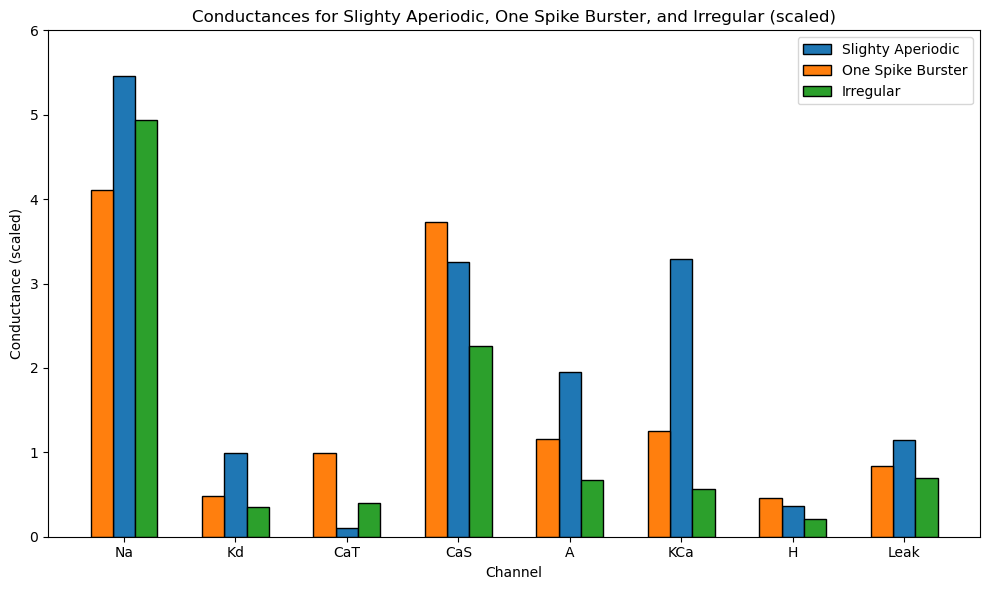

In [3]:
t_eval = np.arange(3000, 4000, 0.05)
g_slighty_aperiodic = [5.45539454e+03, 9.87454280e+01, 1.07073775e+00, 3.25267516e+01, 1.95646309e+02, 3.28593191e+02, 3.62866075e-01, 1.14280089e-02]
g_one_spike_burster = [4.11004236e+03, 4.77276097e+01, 9.89651804e+00, 3.72869050e+01, 1.15419496e+02, 1.25230076e+02, 4.63422595e-01, 8.35225565e-03]

g_irregular = [4.94107434e+03, 3.52729941e+01, 3.98808605e+00, 2.25407522e+01, 6.76836073e+01, 5.64603050e+01, 2.05642756e-01, 6.93623169e-03]

sol_one_spike_burster = simulate_individual_t_eval((get_default_u0(), g_one_spike_burster, t_eval, get_default_parameters()))
sol_slighty_aperiodic = simulate_individual_t_eval((get_default_u0(), g_slighty_aperiodic, t_eval, get_default_parameters()))
sol_irregular = simulate_individual_t_eval((get_default_u0(), g_irregular, t_eval, get_default_parameters()))

fig, axes = plt.subplots(1, 3, figsize=(30, 5))
axes[0].plot(t_eval, sol_slighty_aperiodic[1, :], label='V')
axes[0].set_title('Slighty Aperiodic')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Voltage (mV)')
axes[0].legend()

axes[1].plot(t_eval, sol_one_spike_burster[1, :], label='V')
axes[1].set_title('One Spike Burster')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].legend()

axes[2].plot(t_eval, sol_irregular[1, :], label='V')
axes[2].set_title('Irregular')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].legend()

fig.tight_layout()
plt.savefig('figures/stg_traces_one_spike_burster_aperiodic.svg')
plt.show()

# bar plot of the conductances with scaling for the new conductance sets
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(8)
scaled_g_slighty_aperiodic = [g * s for g, s in zip(g_slighty_aperiodic, scaling_factors)]
scaled_g_one_spike_burster = [g * s for g, s in zip(g_one_spike_burster, scaling_factors)]
scaled_g_irregular = [g * s for g, s in zip(g_irregular, scaling_factors)]

bar1 = ax.bar(index + bar_width, scaled_g_slighty_aperiodic, bar_width, label='Slighty Aperiodic', edgecolor='black')
bar2 = ax.bar(index, scaled_g_one_spike_burster, bar_width, label='One Spike Burster', edgecolor='black')
bar3 = ax.bar(index + 2 * bar_width, scaled_g_irregular, bar_width, label='Irregular', edgecolor='black')

ax.set_xlabel('Channel')
ax.set_ylabel('Conductance (scaled)')
ax.set_title('Conductances for Slighty Aperiodic, One Spike Burster, and Irregular (scaled)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['Na', 'Kd', 'CaT', 'CaS', 'A', 'KCa', 'H', 'Leak'])
ax.set_ylim(0, 6)
ax.legend()
fig.tight_layout()
plt.savefig('figures/stg_conductances_scaled_new.svg')
plt.show()